# Feature Engineering

In [2]:
import sys
import pandas as pd
sys.path.append('../')
from utils.engineering import plot_corr, saving_dataset, calculate_distance

# Data

In [3]:
df = pd.read_csv("./Data/clean_teste_indicium_precificacao.csv")
df.head()

,nome,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
1,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
2,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
3,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
4,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129


# Correlation Matrix

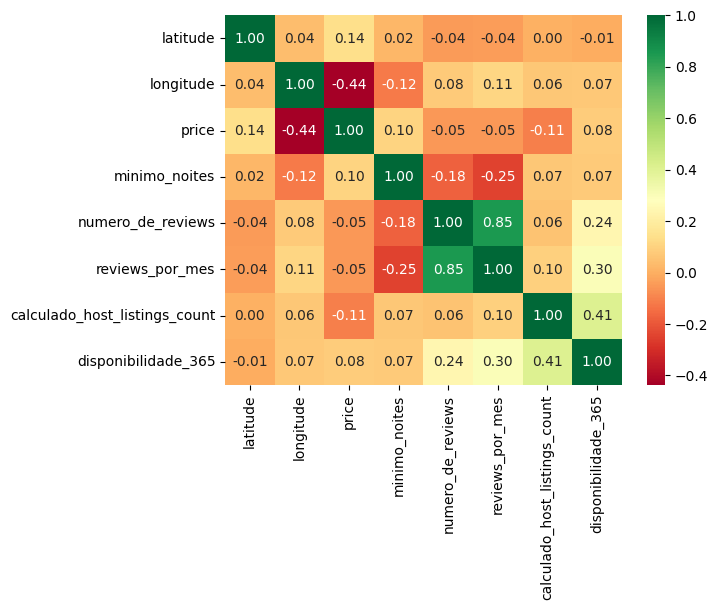

In [4]:
plot_corr(df, "spearman")

### Observations:
- The "spearman" method is used to make sure the correlation is robust against the outliers, and to handle non-linear relations
- `price` has a moderate negative correlation with `longitude`
- `latitude`, `minimo_noites`, `calculado_host_listings_count` all have a small correlation with `price`, with `calculado_host_listings_count` having a negative one
- `disponibilidade_365` doesn't have any correlation with `price` and didn't show any form or relationship with it during the EDA
### Impact:
- `calculado_host_listings_count` can be used to train the models
- `nome` and `disponibilidade_365` can be dropped, since they were used on the EDA and `disponibilidade_365` didn't show any form or relationship with `price`

# Feature Engineering

In [5]:
df = df.drop(columns=["nome", "disponibilidade_365"])

In [6]:
df['distance_to_city_center'] = df.apply(lambda row: calculate_distance(row['latitude'], row['longitude']), axis=1)

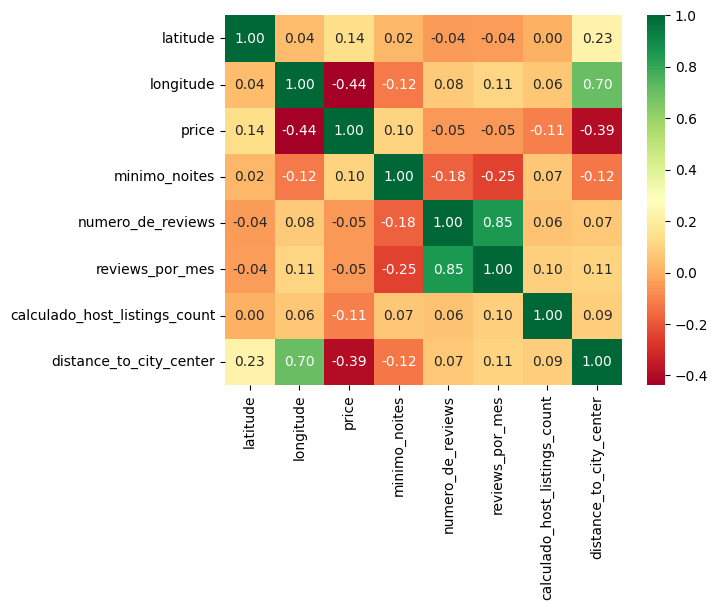

In [7]:
plot_corr(df, "spearman")

### Observations:
- The new feature created `distance_to_city_center` has a negative correlation to `price` of -0.39
### Impact:
- The new feature shows a good correlation to the target in comparison to the other ones, so it's safe to assume that it will be important to the model and will actually help in the predictions

# Saving the files

In [8]:
df.head()

,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,distance_to_city_center
0,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,4.758574
1,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,11.837218
2,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,5.066276
3,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,10.723607
4,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,4.539056


In [9]:
saving_dataset(df, "data", "training_dataset")